In [1]:
import matplotlib.pyplot as plt
from IPython.display import Math, display
import numpy as np
import sympy as sp
from scipy import constants as const
from scipy.optimize import minimize_scalar
from scipy import sparse

#add relative path to backend
import sys
sys.path.append('../../clean_diag/backend')

import trap_units as si
from twod_trap import DoubleTweezer, TwoSiteLattice
from boson_helpers import *

In [2]:
line_number_1 = 45 #for AR=1
state0_1 = 0
state1_1 = 1

line_number_2 = 46 #for AR=2
state0_2 = 0
state1_2 = 1

AR=1:
J = h* 27.481287 Hz
U_s = h* 3748.210 Hz


AR=2:
J = h* 27.481287 Hz
U_s = h* 1774.199 Hz


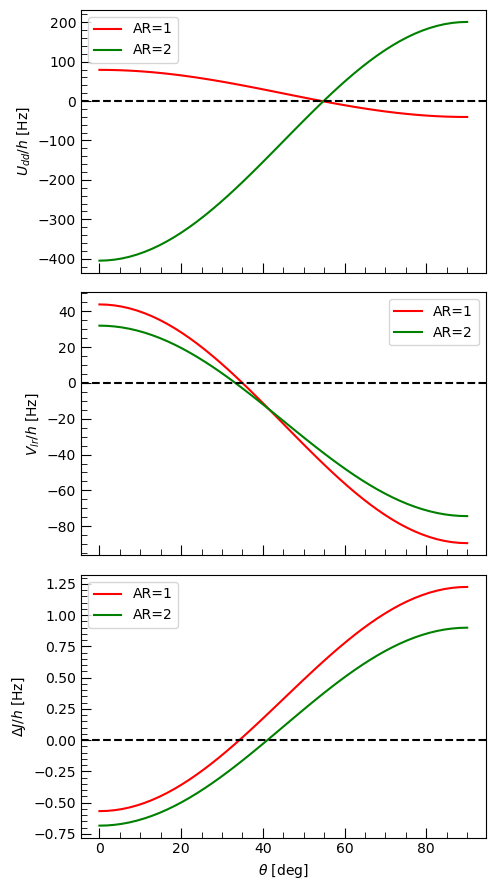

In [8]:
#import data for AR=1
trap, func_ham, res =  import_results(line_number_1)
GS_left_1, GS_right_1 = get_localised_GS(res["states"][state0_1], res["states"][state1_1])

J_1, U_s_1, U_dds_1, angles_1, V_lrs_1, DeltaJs_1 = analyse_diagonalisation(line_number_1,
                                                             state_nr0=state0_1,
                                                             state_nr1=state1_1)
print("AR=1:")
print(f"J = h* {J_1/const.h :3f} Hz")
print(f"U_s = h* {U_s_1/const.h :.3f} Hz")

#omega_left, omega_right = trap.get_both_omega(trap.x)
#print(f"omega_x = 2pi* {float(trap.subs(omega_left))/2/np.pi:.2f}Hz")
#omega_left, omega_right = trap.get_both_omega(trap.z)
#print(f"omega_z = 2pi* {float(trap.subs(omega_left))/2/np.pi:.2f}Hz")

print("\n")

#import data for AR=2
trap, func_ham, res =  import_results(line_number_2)
GS_left_2, GS_right_2 = get_localised_GS(res["states"][state0_2], res["states"][state1_2])

J_2, U_s_2, U_dds_2, angles_2, V_lrs_2, DeltaJs_2 = analyse_diagonalisation(line_number_2,
                                                             state_nr0=state0_2,
                                                             state_nr1=state1_2)
print("AR=2:")
print(f"J = h* {J_2/const.h :3f} Hz")
print(f"U_s = h* {U_s_2/const.h :.3f} Hz")

#omega_left, omega_right = trap.get_both_omega(trap.x)
#print(f"omega_x = 2pi* {float(trap.subs(omega_left))/2/np.pi:.2f}Hz")
#omega_left, omega_right = trap.get_both_omega(trap.z)
#print(f"omega_z = 2pi* {float(trap.subs(omega_left))/2/np.pi:.2f}Hz")


# Create figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(5, 9), sharex=True)

# Define colors
colors = ['red', 'green']

# Plot U_dd
axes[0].plot(np.rad2deg(angles_1), U_dds_1 / const.h, color=colors[0], label="AR=1")
axes[0].plot(np.rad2deg(angles_2), U_dds_2 / const.h, color=colors[1], label="AR=2")
axes[0].axhline(0, color="black", ls="--")
axes[0].set_ylabel(r"$U_{dd} / h$ [Hz]")
axes[0].legend()

# Plot NNI
axes[1].plot(np.rad2deg(angles_1), V_lrs_1 / const.h, color=colors[0], label="AR=1")
axes[1].plot(np.rad2deg(angles_2), V_lrs_2 / const.h, color=colors[1], label="AR=2")
axes[1].axhline(0, color="black", ls="--")
axes[1].set_ylabel(r"$V_{lr} / h$ [Hz]")
axes[1].legend()

# Plot DIT
axes[2].plot(np.rad2deg(angles_1), DeltaJs_1 / const.h, color=colors[0], label="AR=1")
axes[2].plot(np.rad2deg(angles_2), DeltaJs_2 / const.h, color=colors[1], label="AR=2")
axes[2].axhline(0, color="black", ls="--")
axes[2].set_xlabel(r"$\theta$ [deg]")
axes[2].set_ylabel(r"$\Delta J / h$ [Hz]")
axes[2].legend()

# Customize ticks for all subplots
for ax in axes:
    ax.tick_params(axis='both', which='both', direction='in', length=5)  # Tick marks inside
    ax.tick_params(axis='both', which='major', length=7)  # Major ticks longer
    ax.tick_params(axis='both', which='minor', length=4)  # Minor ticks shorter
    ax.minorticks_on()  # Enable minor ticks

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Plot wavefunctions
## AR=1

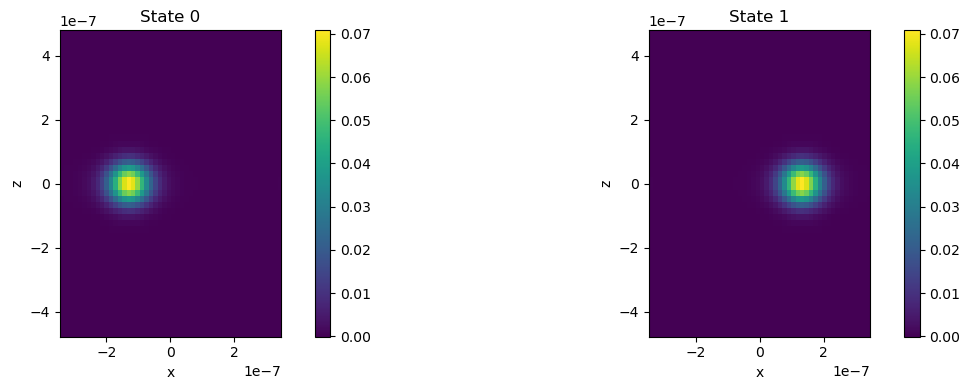

In [4]:
#plot wavefunctions
n_states = 2

states_plot = [GS_left_1.real, GS_right_1.real]
#states_plot = np.angle(states)
#states_plot = states.imag
#states_plot = np.abs(states)**2

# Create a 1xn_states grid of subplots (1 row, n_states columns)
fig, axes = plt.subplots(1, n_states, figsize=(13, 4))  # Adjust the size as needed

# Loop over the state numbers from 0 to n_states-1
for state_number, ax in zip(range(n_states), axes):
    # Slice through the y-direction and rotate the x-z plane (by swapping x and z)
    im = ax.imshow(states_plot[state_number][:, int(res["size"][1]/2), :].T,
                   extent=[*res["extend"][0], *res["extend"][2]], origin="lower",
                   vmin=np.min(states_plot[state_number]), vmax=np.max(states_plot[state_number]))

    # Set labels for each subplot
    ax.set_xlabel("x")
    ax.set_ylabel("z")
    ax.set_title(f"State {state_number}")
    fig.colorbar(im, ax=ax)  

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

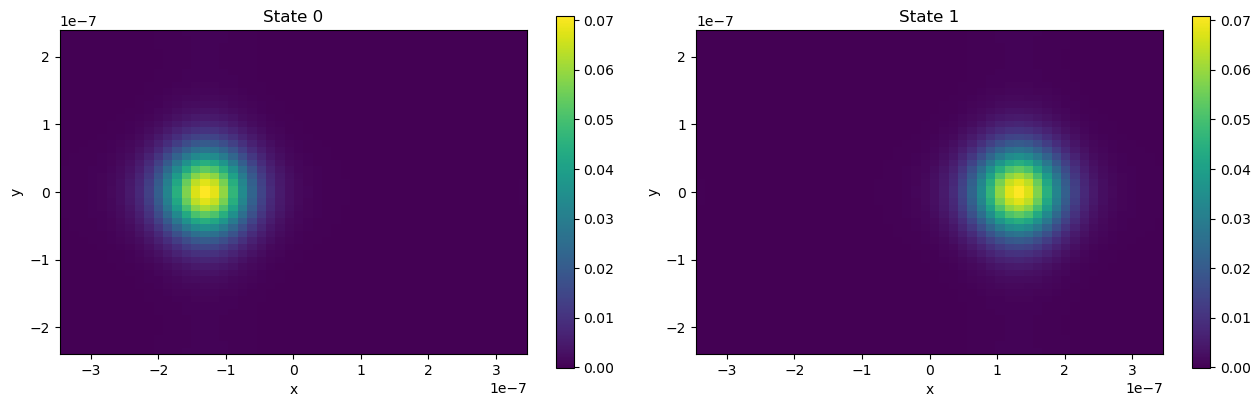

In [5]:
n_states = 2

states_plot = [GS_left_1.real, GS_right_1.real]
#states_plot = np.angle(states)
#states_plot = states.imag
#states_plot = np.abs(states)**2

# Create a 1xn_states grid of subplots (1 row, n_states columns)
fig, axes = plt.subplots(1, n_states, figsize=(13, 4))  # Adjust the size as needed

# Loop over the state numbers from 0 to n_states-1
for state_number, ax in zip(range(n_states), axes):
    # Slice through the y-direction and rotate the x-z plane (by swapping x and z)
    im = ax.imshow(states_plot[state_number][:, :, int(res["size"][2]/2)].T,
                   extent=[*res["extend"][0], *res["extend"][1]], origin="lower",
                   vmin=np.min(states_plot[state_number]), vmax=np.max(states_plot[state_number]))

    # Set labels for each subplot
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"State {state_number}")
    fig.colorbar(im, ax=ax)  

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## AR=2

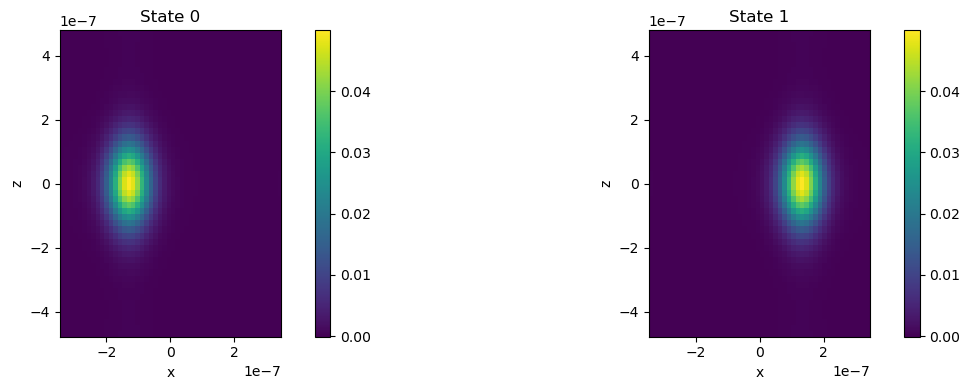

In [6]:
#plot wavefunctions
n_states = 2

states_plot = [GS_left_2.real, GS_right_2.real]
#states_plot = np.angle(states)
#states_plot = states.imag
#states_plot = np.abs(states)**2

# Create a 1xn_states grid of subplots (1 row, n_states columns)
fig, axes = plt.subplots(1, n_states, figsize=(13, 4))  # Adjust the size as needed

# Loop over the state numbers from 0 to n_states-1
for state_number, ax in zip(range(n_states), axes):
    # Slice through the y-direction and rotate the x-z plane (by swapping x and z)
    im = ax.imshow(states_plot[state_number][:, int(res["size"][1]/2), :].T,
                   extent=[*res["extend"][0], *res["extend"][2]], origin="lower",
                   vmin=np.min(states_plot[state_number]), vmax=np.max(states_plot[state_number]))

    # Set labels for each subplot
    ax.set_xlabel("x")
    ax.set_ylabel("z")
    ax.set_title(f"State {state_number}")
    fig.colorbar(im, ax=ax)  

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

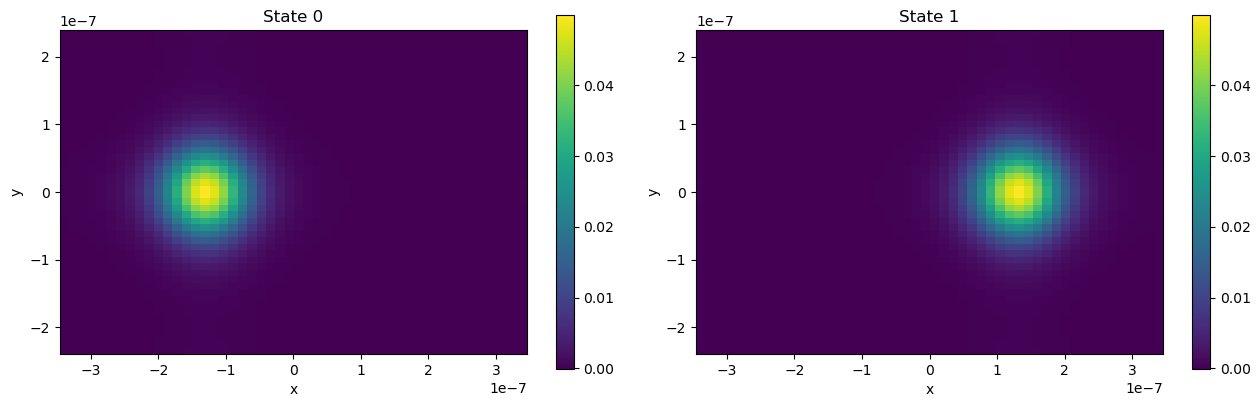

In [7]:
n_states = 2

states_plot = [GS_left_2.real, GS_right_2.real]
#states_plot = np.angle(states)
#states_plot = states.imag
#states_plot = np.abs(states)**2

# Create a 1xn_states grid of subplots (1 row, n_states columns)
fig, axes = plt.subplots(1, n_states, figsize=(13, 4))  # Adjust the size as needed

# Loop over the state numbers from 0 to n_states-1
for state_number, ax in zip(range(n_states), axes):
    # Slice through the y-direction and rotate the x-z plane (by swapping x and z)
    im = ax.imshow(states_plot[state_number][:, :, int(res["size"][2]/2)].T,
                   extent=[*res["extend"][0], *res["extend"][1]], origin="lower",
                   vmin=np.min(states_plot[state_number]), vmax=np.max(states_plot[state_number]))

    # Set labels for each subplot
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"State {state_number}")
    fig.colorbar(im, ax=ax)  

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()